In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
seaborn.set_context(context='talk', font_scale=1.2)

In [7]:
dataset = pandas.read_csv(
    '../tp01analisisyvisualizacion/dataset/hfi_cc_2018.csv')

In [8]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [10]:
dataset[:10]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


In [11]:
dataset.shape

(1458, 123)

In [12]:

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [13]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0



1. Estadísticos descriptivos

   1.1) Calcular el rango de las variables.
   Rta: el rango de años fue de 8 años entre 2008 y 2016. Las variables inherentes a identidad y relaciones presentaron un rango de 10 unidades que corresponden a una puntuación entre 0 y 10. En cuanto al rango de los rankings fue de 161, dado que eran 162 países. Finalmente el score de la libertad económico osciló entre 2.88 y 9.19 con un rango de 6.31, y el score de libertad humana desde 3.76 hasta 9.12 cuyo rango es de 5.36
   
    


In [14]:
dataset[important_cols] .describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


1.2.a) Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo

In [15]:
dataset['pf_identity'].describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [16]:
dataset['hf_score'].describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64


1.2.b)   Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score de Latinoamérica y el caribe y compararla con las del mundo 
e "identidad y relaciones"

Respuesta: Al comparar las medidas resúmenes de las variables propuestas, entre el mundo y la región Latinoamérica y el caribe (LAC), se pudo observar que para la primer variable "libertad humana:hf_score (puntaje)"; los resultados fueron similares en cuanto al promedio pero con menor dispersión de los datos en la región LAC que en el mundo, cuyas  valores son media(DE) de "6.99(1.02) y 7.04(0.6)",respectivamente. Al analizar la distribución de estas variables se pudo comprobar que tanto para LAC y como para el mundo no fueron simétricas, por ello creímos pertinente usar la mediana que fueron 7.02 y 6.92, respectivamente,los que indicaron que el 50 % de los países de la LAC y del mundo su score de libertad humana es menor a esos valores.
Identidad y relaciones

 Al contrastar los resultados de la segunda variable (identidad y relaciones), se observó que 
para todo el mundo la media (DE) fue de 7.33(3.15), mientras que para LAC resultó mayor  pero con menor dispersión 8.76 (1.71. Al observar las medianas fueron de 9.16 para el primer grupo y para el segundo 10, respectivamente. Por lo expuesto se podría inferir que el grupo "LAC" presenta una mayor puntuación a lo que se refiere a identidad y relaciones en esta población y sus datos no son tan dispersos en relación a estas métricas a nivel mundial.

¿Tiene sentido calcular la moda?
En general no tendría sentido calcular la moda, ya qe se aplica principalmente para variables cualitativas o categóricas, pero al observar la distribución de los datos para cada variable en distintos gráficos presentados (  )para la viarable hf_score en el mundo se observó una distribución Bimodal en torno a los valores del score 6.8 y 8.2 . 



In [17]:
dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [18]:
dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

1.3.1 ¿Son todos los valores de pf_identity y hf_score directamente comparables?
No son comparables directamente debido a que una de las variables se utiliza en la construcción de la otra variable
1.3.2 ¿Qué otra variable podría influenciarlos?
La otra variable que podria influenciarlos es la libertad economica (ef_score)

1.3.3 ¿Cómo pueden sanearse los valores faltantes?
Los datos faltantes solo podrian sanearse en caso de contar con algunas de las variables que contruyen el calculo de la otra.
No es el caso de este conjunto de datos y de esa forma estimar la faltante. 
Ej Surinam, Sudan, etc.


In [19]:
listar_cols = ['hf_score', 'pf_identity', 'pf_score', 'countries']
dataset[listar_cols]

,hf_score,pf_identity,pf_score,countries
0,7.568140,6.250000,7.596281,Albania
1,5.135886,0.833333,5.281772,Algeria
2,5.640662,7.500000,6.111324,Angola
3,6.469848,10.000000,8.099696,Argentina
4,7.241402,8.000000,6.912804,Armenia
5,8.582219,9.250000,9.184438,Australia
6,8.413474,10.000000,9.246948,Austria
7,6.083277,6.250000,5.676553,Azerbaijan
8,7.397269,10.000000,7.454538,Bahamas
9,6.848035,3.333333,6.136070,Bahrain


plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset[important_cols],
                    x='hf_score',
                    y='pf_identity')

1.3.4¿Encuentra outliers en estas dos variables? 
Si, para la variable hf_score se encuentra en forma global, al analizarlo según las regiones solo en algunas de ellas se observan datos atipicos.
En cambio, para la variable pf_identity a nivel global no se observan outliers, aunque si en algunas regiones.
¿Qué método utiliza para detectarlos? 
Construimos diagramas de caja (box plot)
¿Los outliers, son globales o por grupo? 
Contestado en el punto anterior
¿Los eliminaría del conjunto de datos?
No, porque son un dato, ya que nos muestran valores atípicos que pueden formar parte de una "transición"en las tendencias actuales sobre estas variables, y deben ser tenidas en cuanta a la hora de analizar los datos.


(array([0]), <a list of 1 Text xticklabel objects>)

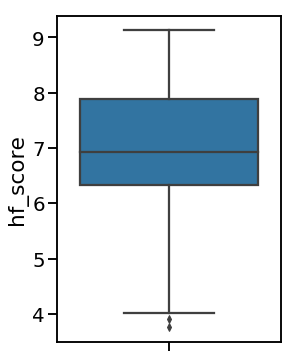

In [20]:
plt.figure(figsize=(4,6))
seaborn.boxplot(data=dataset, y='hf_score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

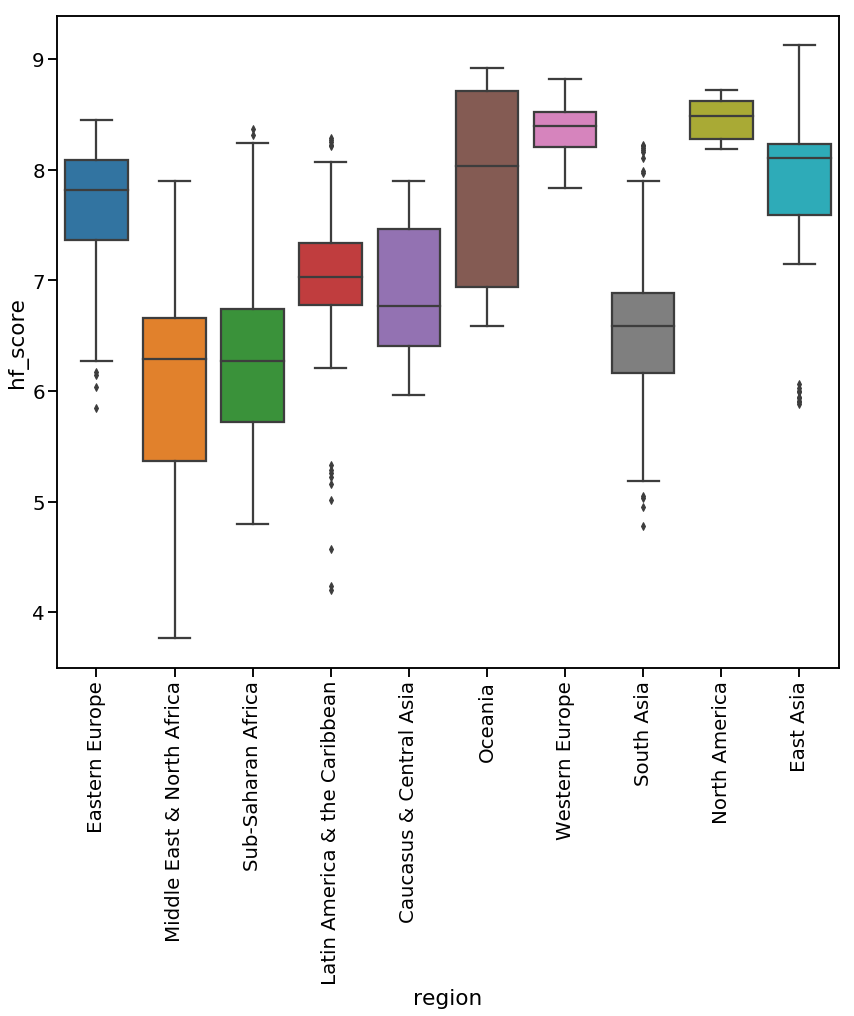

In [21]:
plt.figure(figsize=(14,12))
seaborn.boxplot(data=dataset, x='region', y='hf_score')
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

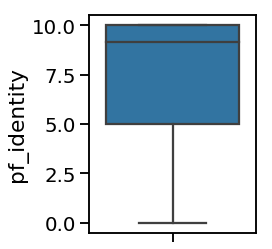

In [22]:
plt.figure(figsize=(3,4))
seaborn.boxplot(data=dataset, y='pf_identity')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

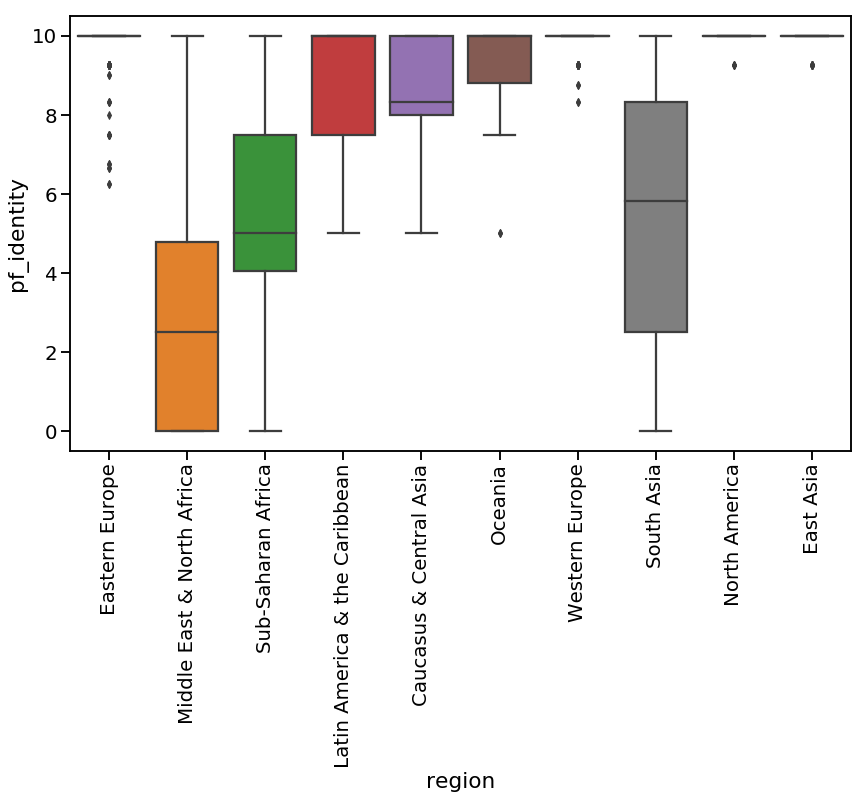

In [23]:
plt.figure(figsize=(14,8))
seaborn.boxplot(data=dataset, x='region', y='pf_identity')
plt.xticks(rotation=90)

2. Agregación de datos

  2.1.  Grafiquen la media de la variable pf_identity y hf_score a través de los años.
    


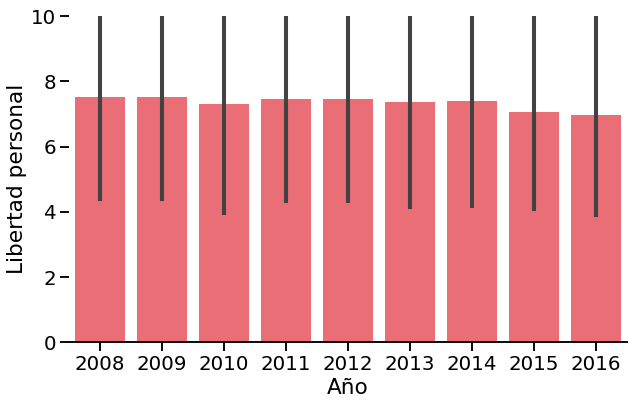

In [30]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='year', y='pf_identity',
               color=RED, ci='sd')
plt.ylabel('Libertad personal')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)

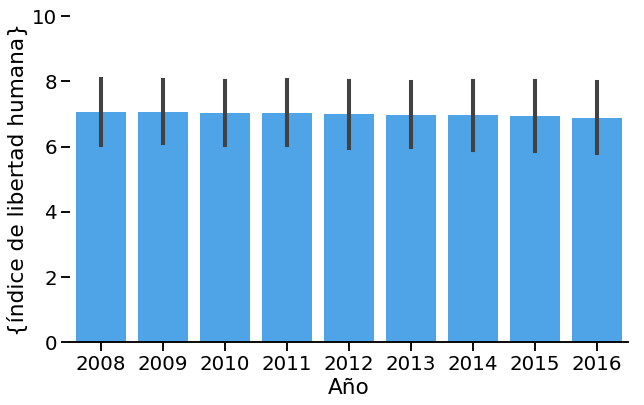

In [33]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='year', y='hf_score',
               color=BLUE, ci='sd')
plt.ylabel('{índice de libertad humana}')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)

2.2. Realicen los mismos gráficos, pero separando por regiones. ¿La tendencia observada, es la misma que si no dividimos por regiones?
No, no es la misma, ya que no se visualizan diferencias al analizar tanto la libertad humana como la personal a nivel mundial en el transcurso de los años, sin embargo al analizar por regiones, se observan las diferencias entre ellas, pero en el promedio de los años.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

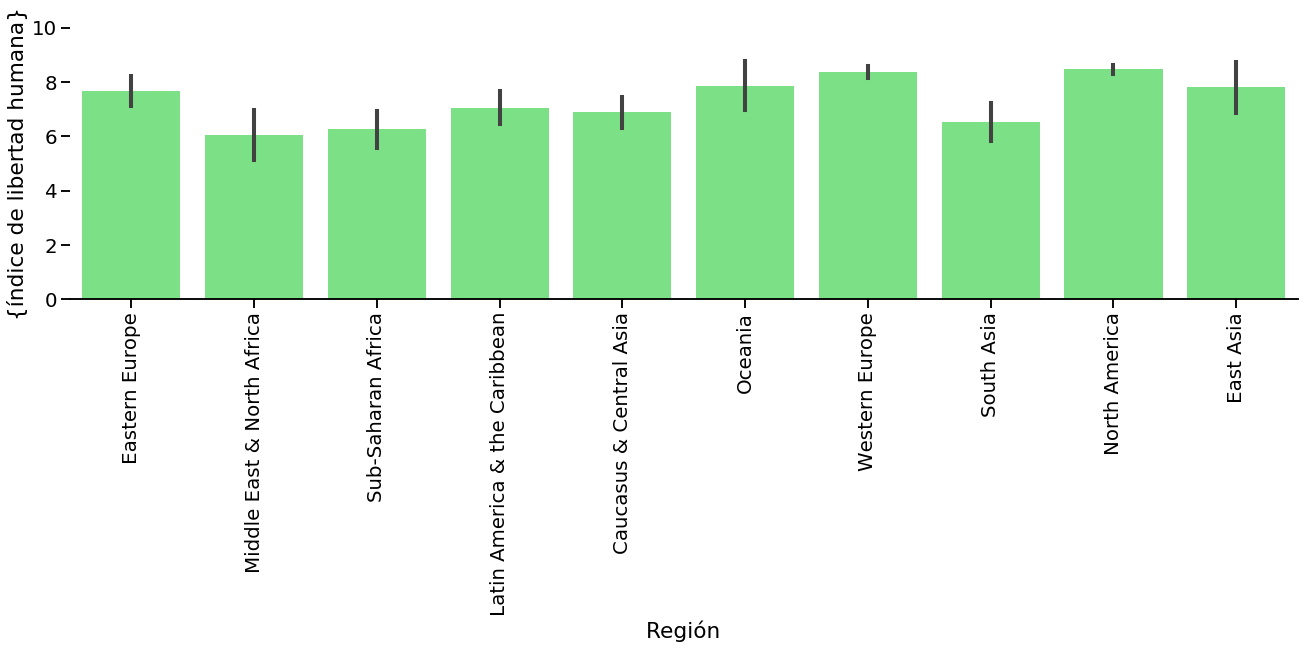

In [44]:
plt.figure(figsize=(22,5))
seaborn.barplot(data=dataset, x='region', y='hf_score',
               color=GREEN, ci='sd')
plt.ylabel('{índice de libertad humana}')
plt.xlabel('Región')
plt.ylim(0, 10)
seaborn.despine(left=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

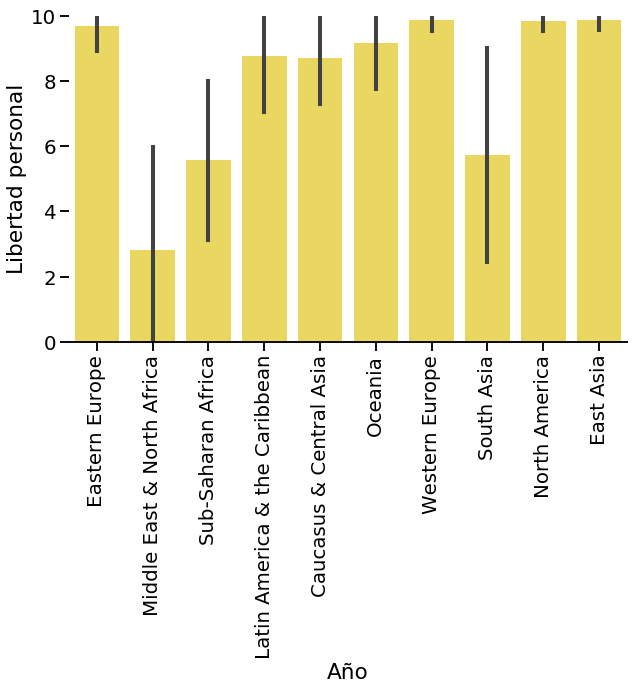

In [46]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='region', y='pf_identity',
           
               color=YELLOW, ci='sd')
plt.ylabel('Libertad personal')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)
plt.xticks(rotation=90)




   2.2. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?
   Realizamos un gráfico de las medias de la variable libertad personal por países para la región Latinoamericana y del Caribe y seleccionamos los países cuyo valores medios eran extremos y alguno que presentara un valor del medio.
   Elegimos Argentina, Barbados y Chile.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

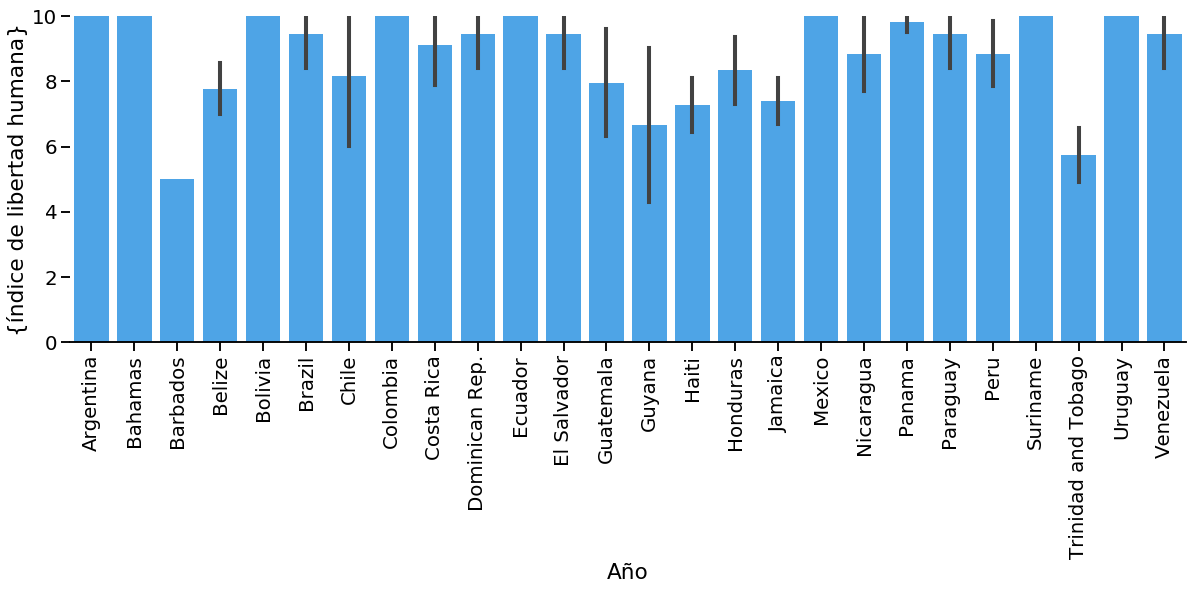

In [53]:
plt.figure(figsize=(20,6))
seaborn.barplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], x='countries', y='pf_identity',
               color=BLUE, ci='sd')
plt.ylabel('{índice de libertad humana}')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)
plt.xticks(rotation=90)

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


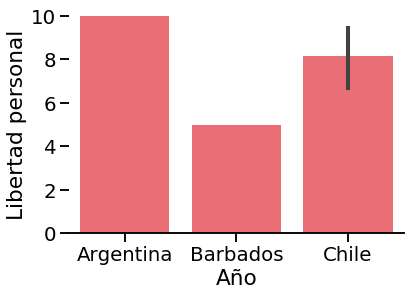

In [91]:
plt.figure(figsize=(6,4))
seaborn.barplot(data=dataset[dataset['countries'].isin(['Argentina', 'Chile', 'Barbados'])], 
                x='countries', y='pf_identity', color=RED)
plt.ylabel('Libertad personal')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)


2.4. Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?


Aparentemente, la libertad humana a medida que pasan los años presenta una tendencia decresciente mas marcada, mientras la libertad económica tiene un comportamiento inverso y pero menos marcado mostrando mayor estabilidad.

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


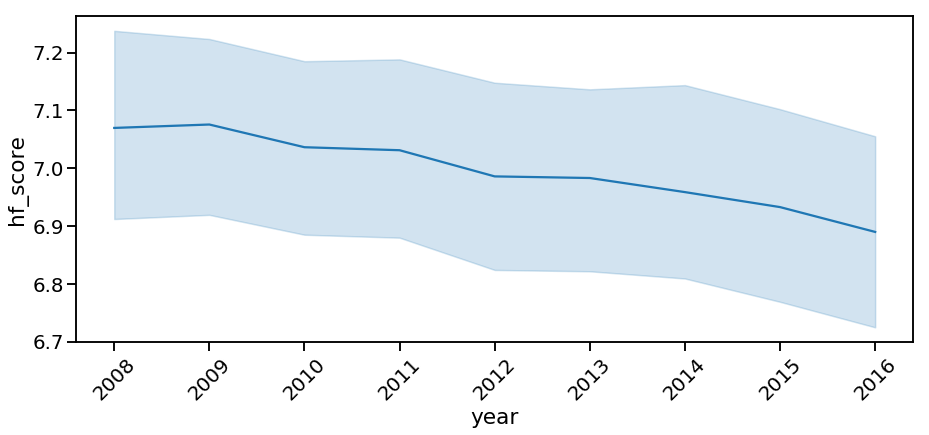

In [77]:
plt.figure(figsize=(15,6))
seaborn.lineplot(data=dataset[important_cols],
                 x='year', y='hf_score')
                 
plt.xticks(rotation=45);

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


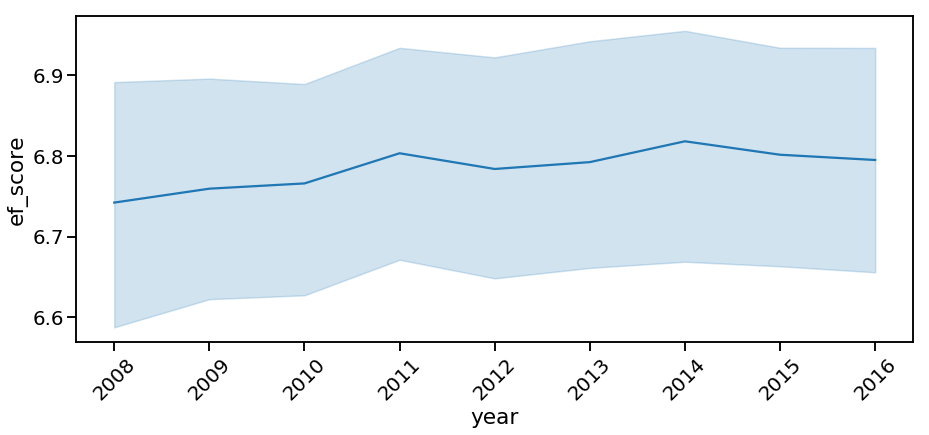

In [78]:
plt.figure(figsize=(15,6))
seaborn.lineplot(data=dataset[important_cols],
                 x='year', y='ef_score')
                 
plt.xticks(rotation=45);

In [8]:
import statistics

import matplotlib.pyplot as plt

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


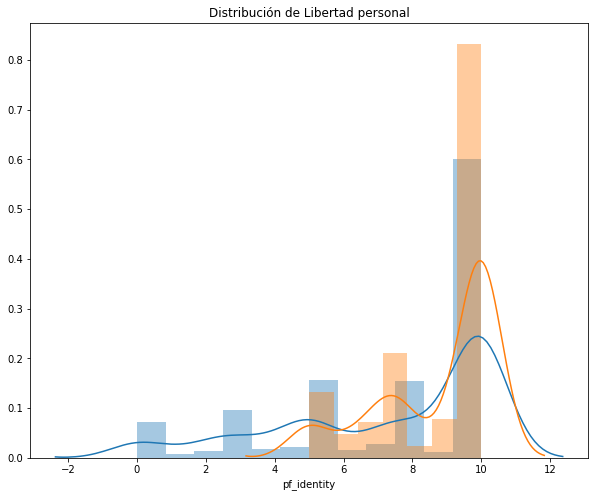

In [24]:
plt.figure(figsize=(10,8))
plt.title('Distribución de Libertad personal')
seaborn.distplot(dataset.pf_identity.dropna(axis=0, how='all'))
                 
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean'].pf_identity.dropna(axis=0, how='all'))

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 22.,   0.,   0.,   0.,   0.,   8.,   6.,   6.,   0.,   0.,  35.,
          0.,   0.,   4.,   0.,   4.,   7.,   4.,   0., 136.]),
 array([ 5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,
         7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,
         9.5 ,  9.75, 10.  ]),
 <a list of 20 Patch objects>)

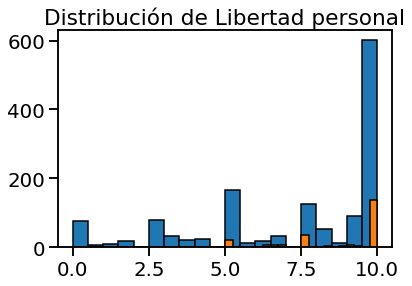

In [22]:
plt.title('Distribución de Libertad personal')
plt.hist(dataset.pf_identity, edgeColor='black', bins=20) 
plt.hist(dataset[dataset['region'] == 'Latin America & the Caribbean'].pf_identity, edgeColor='black', bins=20) 


Para corroborar si las distribuciones graficadas lo hacen normalmente, verificamos mediante el test de KS


In [16]:
#En este caso probamos normalidad para la variable Libertad Personal a nivel Global 
from scipy import stats
import numpy as np
 x=np.array([ 22.,   0.,   0.,   0.,   0.,   8.,   6.,   6.,   0.,   0.,  35.,
          0.,   0.,   4.,   0.,   4.,   7.,   4.,   0., 136.])
stats.kstest(x, 'norm')

KstestResult(statistic=0.5, pvalue=3.7875952405341806e-05)

Según el valor de p obtenido que es muy inferior a 0,05 se puede inferir que no sigue una distribución normal la variable libertad personal a nivel global.

In [18]:
#En este caso probamos normalidad para la variable Libertad Personal para la región de Latinoamérica y el Caribe


from scipy import stats
import numpy as np
x=np.array([ 5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,
         7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,
         9.5 ,  9.75, 10.  ])
stats.kstest(x, 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

In [ ]:
Según el valor de p obtenido que es < a 0,05 se puede inferir que no sigue una distribución normal la variable 
libertad personal para la región de países de LAC


C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


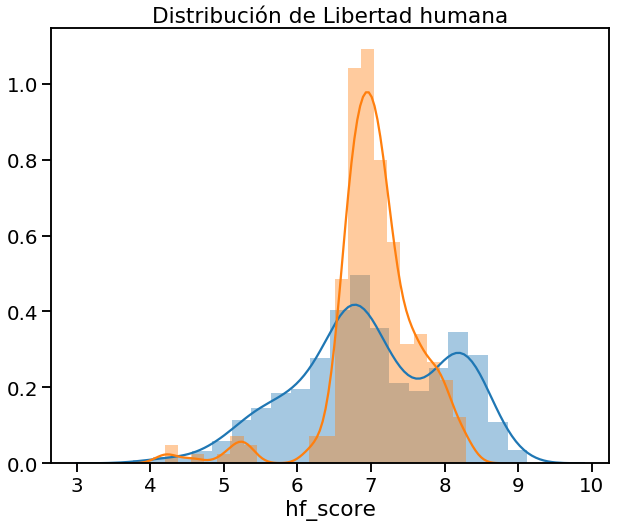

In [17]:
#Para visualizar la distribución de la variable libertad humana construimos la siguiente figura:

plt.figure(figsize=(10,8))
plt.title('Distribución de Libertad humana')
seaborn.distplot(dataset.hf_score.dropna(axis=0, how='all'))
                 
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean'].hf_score.dropna(axis=0, how='all'))

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  1.,  0.,  1.,  1.,  4.,  0.,  0.,  0.,  3.,  1., 14., 50.,
        48., 39., 20., 18., 12., 13.,  5.]),
 array([4.20072446, 4.40519585, 4.60966724, 4.81413864, 5.01861003,
        5.22308142, 5.42755282, 5.63202421, 5.8364956 , 6.040967  ,
        6.24543839, 6.44990979, 6.65438118, 6.85885257, 7.06332397,
        7.26779536, 7.47226675, 7.67673815, 7.88120954, 8.08568093,
        8.29015233]),
 <a list of 20 Patch objects>)

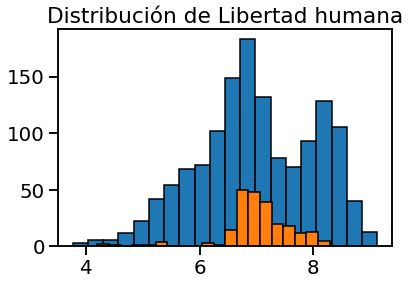

In [23]:
plt.title('Distribución de Libertad humana')
plt.hist(dataset.hf_score, edgeColor='black', bins=20) 
plt.hist(dataset[dataset['region'] == 'Latin America & the Caribbean'].hf_score, edgeColor='black', bins=20) 


In [ ]:
Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden a la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
    

In [30]:
##En este caso probamos normalidad para la variable Libertad Humana a nivel Global 
from scipy import stats
import numpy as np
x=np.array([ 2.,  1.,  0.,  1.,  1.,  4.,  0.,  0.,  0.,  3.,  1., 14., 50.,
        48., 39., 20., 18., 12., 13.,  5.])
stats.kstest(x, 'norm')

KstestResult(statistic=0.6413447460685429, pvalue=1.5557499954965692e-08)

In [ ]:
Según el valor de p obtenido que es muy pequeño e inferior a 0,05 permite inferir que no sigue una distribución normal 
la variable libertad humana a nivel global.

In [28]:
#En este caso probamos normalidad para la variable Libertad Humana para la región de Latinoamérica y el Caribe
from scipy import stats
import numpy as np
x=np.array([ 4.20072446, 4.40519585, 4.60966724, 4.81413864, 5.01861003,
        5.22308142, 5.42755282, 5.63202421, 5.8364956 , 6.040967  ,
        6.24543839, 6.44990979, 6.65438118, 6.85885257, 7.06332397,
        7.26779536, 7.47226675, 7.67673815, 7.88120954, 8.08568093,
        8.29015233 ])
stats.kstest(x, 'norm')

KstestResult(statistic=0.9999866968879758, pvalue=0.0)

Al Observar el valor de p de la prueba de Kolmogorov Smirnov para la libertad humana para la región de Latinoamérica y el Caribe, el valor de p<0.05 indica que la distribución no sigue una distribución normal. 

In [ ]:
Realizar un gráfico QQ de las mismas distribuciones. 

In [24]:
import matplotlib.pyplot as plt
from scipy import stats
 

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


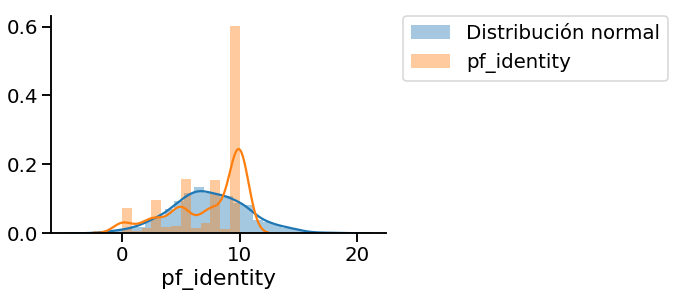

In [25]:
# Para estimar los parámetros muestrales.
loc, scale = stats.norm.fit(dataset.pf_identity.dropna())
norm_dist = stats.norm(loc, scale)

#Para generar la muestra
sample = norm_dist.rvs(1000)

#En este gráfico podemos observar si se trata de una muestra con distribución normal, y 
#de esta forma sus parámetros serán la media y desvío estándar. 

#En este caso se observó que la variable libertad personal no tiene una distribución normal.

seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset.pf_identity.dropna(), label='pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset.pf_identity.dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset.pf_identity.dropna())), percs)
 

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


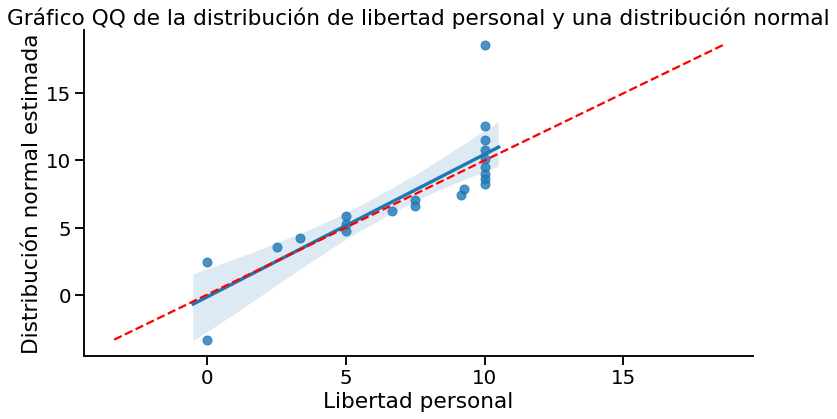

In [26]:
# ADEMÁS SE REALIZA EL SIGUIENTE DIAGRAMA PARA CORROBORAR SI SIGUE UNA DISTRIBUCIÓN NORMAL
#Gráfico QQ de la distribución de libertad personal y una distribución normal
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Libertad personal')
plt.ylabel('Distribución normal estimada')
plt.title('Gráfico QQ de la distribución de libertad personal y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="RED", ls="--")
seaborn.despine()
 

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


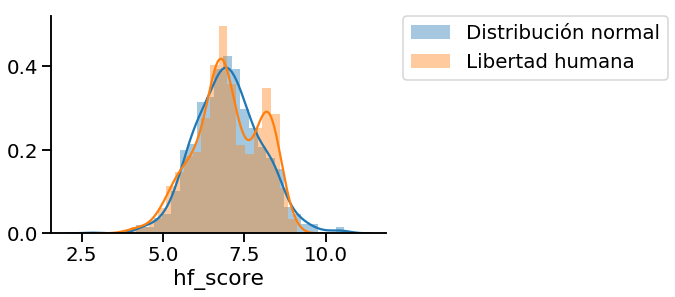

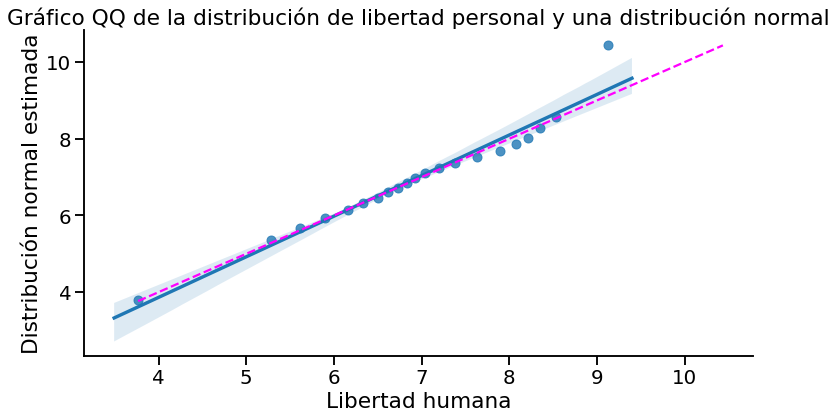

In [27]:
#ESTO ES PARA LA VARIABLE HF_SCORE
 
loc, scale = stats.norm.fit(dataset.hf_score.dropna())
norm_dist = stats.norm(loc, scale)
 
sample = norm_dist.rvs(1000)
 
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset.hf_score.dropna(), label='Libertad humana')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset.hf_score.dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset.hf_score.dropna())), percs)
 
#Gráfico de QQplot
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Libertad humana')
plt.ylabel('Distribución normal estimada')
plt.title('Gráfico QQ de la distribución de libertad personal y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#ff00ff", ls="--")
seaborn.despine()

Se puede observar que para la variable hf_score la distribución de sus percentiles se comportó al igual que para una distribución normal. Para el caso de la pf_identity se observaron muchos puntos alineados en la puntuación 10.
 
 


    Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior.
    ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?


In [36]:
# A nivel Global
skew_pf = stats.skew (dataset.pf_identity.dropna())
skew_hf = stats.skew (dataset.hf_score.dropna())

print ('Skew de la variable pf_identity: ' , skew_pf)
print ('Skew de la variable hf_score: ' , skew_hf)

kurtosis_pf = stats.kurtosis(dataset.pf_identity.dropna())
kurtosis_hf = stats.kurtosis(dataset.hf_score.dropna())

print ('Curtosis de la variable pf_identity: ' , kurtosis_pf)
print ('Curtosis de la variable hf_score: ' , kurtosis_hf)


Skew de la variable pf_identity:  -0.9121780542847563
Skew de la variable hf_score:  -0.21205190437691196
Curtosis de la variable pf_identity:  -0.4148322234251629
Curtosis de la variable hf_score:  -0.5101904315124792


In [ ]:
La asimetría es negativa indicado que se alarga la distribución hacia la izquierda del promedio y mayor concentración de datos a la derecha del mismo.
La curtosis para ambas variables a nivel global indican poca concentración de datos alrededor de la media.

In [37]:
#LATINOAMERICA Y EL CARIBE

skew_pf = stats.skew (dataset[dataset['region'] == 'Latin America & the Caribbean'].pf_identity.dropna())
skew_hf = stats.skew (dataset[dataset['region'] == 'Latin America & the Caribbean'].hf_score.dropna())

print ('Skew de la variable pf_identity: ' , skew_pf)
print ('Skew de la variable hf_score: ' , skew_hf)

kurtosis_pf = stats.kurtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']. pf_identity.dropna())
kurtosis_hf = stats.kurtosis(dataset[dataset['region'] == 'Latin America & the Caribbean'].hf_score.dropna())

print ('Curtosis de la variable pf_identity: ' , kurtosis_pf)
print ('Curtosis de la variable hf_score: ' , kurtosis_hf)

Skew de la variable pf_identity:  -1.0478440216224703
Skew de la variable hf_score:  -1.442092151332142
Curtosis de la variable pf_identity:  -0.2953048553672586
Curtosis de la variable hf_score:  5.340188962725749


In [ ]:
En LAC también para ambas variables la asimetría es negativa indicado que se alarga la distribución hacia la izquierda del promedio y mayor concentración de datos a la derecha del mismo.
La curtosis en LAC para Libertad personal indica que es mas chata la distribución, en cambio para libertad humana es mas leptocúrtica.
Es decir hay una mayor concentración de datos en torno al valor medio (K=5,34).


3. Correlaciones

3.1.    Las libertades sociales y económicas, ¿van siempre de la mano?
    ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación.

    


C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


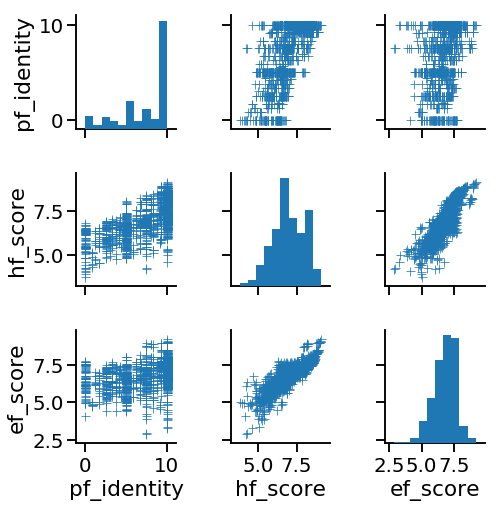

In [38]:

cols=['pf_identity', 'hf_score', 'ef_score']
plot_data = dataset[cols]
seaborn.pairplot(
    data=plot_data,
    vars=['pf_identity', 'hf_score', 'ef_score'],  markers='+')


3.2. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
   

La conclusiones que podemos sacar es que que a medida que crece la libertad ecnomómica crece o mejora la libertad humana y 
en menor medida la personal, esto probablemente se deba a que la libertad personal está calculada a partir del promedio de 
la libertad humana y económica y por lo tanto las 3 variables muestran una correlación

3.3.  Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.



C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

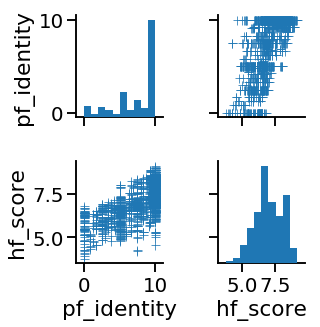

In [42]:

cols=['pf_identity', 'hf_score']
plot_data = dataset[cols]
seaborn.pairplot(
    data=plot_data,
    vars=['pf_identity', 'hf_score'],  markers='+')


Se observa una correlación positiva entre ambas variables. La variable pf_identity crece en la medida que crece la variable hf_score, basicamente indica que a medida que mejoran las libertades personales mejora la libertad humana.


C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


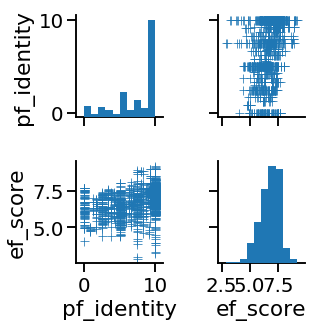

In [43]:
cols=['pf_identity', 'ef_score']
plot_data = dataset[cols]
seaborn.pairplot(
    data=plot_data,
    vars=['pf_identity', 'ef_score'],  markers='+')


No se observa una tendencia entre las variables marcadas. 



  3.4. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.
    

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


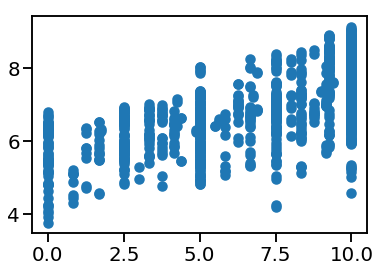

In [44]:
import numpy as np
from scipy import stats as ss
r = dataset.corr(method="pearson")["pf_identity"]["hf_score"]
pendiente, ordenada, pearson, p, error = ss.linregress(dataset["pf_identity"],dataset["hf_score"])
def recta(x):
    return pendiente*x + ordenada
recta = np.vectorize(recta)
linea = recta(np.arange(10))
plt.scatter(dataset["pf_identity"],dataset["hf_score"])
plt.plot(linea)
plt.show()

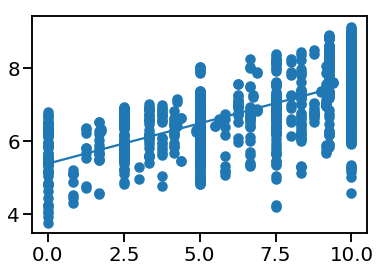

In [46]:
def recta(x):
    pendiente = dataset.cov()["pf_identity"]["hf_score"]/dataset["pf_identity"].var()
    return pendiente*(x-dataset["pf_identity"].mean())+dataset["hf_score"].mean()
line = [recta(x) for x in np.arange(10)]
plt.scatter(dataset["pf_identity"],dataset["hf_score"])
plt.plot(line)
plt.show()

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


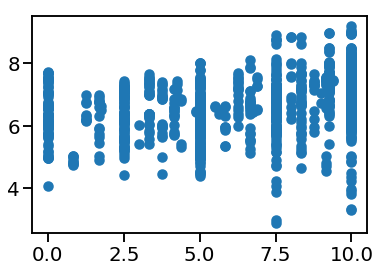

In [47]:
r = dataset.corr(method="pearson")["pf_identity"]["ef_score"]
pendiente, ordenada, pearson, p, error = ss.linregress(dataset["pf_identity"],dataset["ef_score"])

def recta(x):
    return pendiente*x + ordenada

recta = np.vectorize(recta)
linea = recta(np.arange(10))
plt.scatter(dataset["pf_identity"],dataset["ef_score"])
plt.plot(linea)
plt.show()

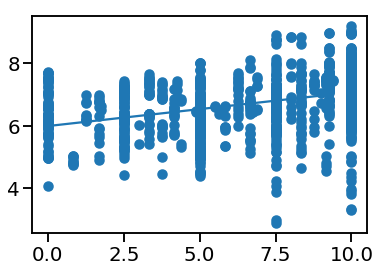

In [48]:
def recta(x):
    pendiente = dataset.cov()["pf_identity"]["ef_score"]/dataset["pf_identity"].var()
    return pendiente*(x-dataset["pf_identity"].mean())+dataset["ef_score"].mean()
line = [recta(x) for x in np.arange(10)]
plt.scatter(dataset["pf_identity"],dataset["ef_score"])
plt.plot(line)
plt.show()


En lineas generales se aprecia que la variable ef_score tiene una correlacion con pf_identity mas fuerte que la correlación que tiene la variable hf_score con pf_identity


In [52]:
pearson_pf = dataset.corr(method="pearson")["pf_identity"]["hf_score"]
print ('Pearson  entre pf_identity y hf_score: ', pearson_pf )


pearson_pf = dataset.corr(method="pearson")["pf_identity"]["ef_score"]
print ('Pearson  entre pf_identity y ef_score: ', pearson_pf )

pearson_pf = dataset.corr(method="pearson")["ef_score"]["hf_score"]
print ('Pearson  entre ef_score y hf_score: ', pearson_pf )

Pearson  entre pf_identity y hf_score:  0.6777541950437723
Pearson  entre pf_identity y ef_score:  0.3888772379714594
Pearson  entre ef_score y hf_score:  0.8548651479506567


En función del análisis visual y del coeficiente de correlación de Pearson se puede deducir que existe una correlación fuerte entrela libertad humana y la libertad personal y económica y una correlación debil entre la libertad personal y a económica (r= 0,38)
                 }

Finamente, para responder a los interrogantes planteados al principio acerca de:

1.1.¿Qué niveles de libertad se viven en Latinoamérica, específicamente en cuanto a libertades de identidad?

Los niveles en cuanto a libertades de identidad que se viven en Latinoamérica son bastante desiguales, existen países como Barbados y Trinidad y Tobago donde la puntuación promedio es muy baja (5 aprox.), y otra mayor cantidad de países que alcanzan una puntuación de 10. 

1.2.¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo y en función de la asimetría en la distribución, es correcto usar la mediana como medida de posición y el Rango intercuartílico como de dispersión.
La mediana a nivel mundial es de 9.16 y la de los países de LAC 10 para la variable libertad personal (Identidades y relaciones, reflejando que el 50 % de los paises presenan valores menores a la mediana y el resto iguales o mayores. Si para esta variable se tiene un puntaje de 4.5 en alguna región, se debe comparar con la de nivel mundial con la cual se encuentran distantes. Se encuentra a 1 rango interquantilico de distancia pero aún así se considera un valor bajo. Lo mismo ocurre al comparar a nivel país para una región determinada (en este caso LAC) que presenta una mediana de 10.
          
          
          2.¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
A simple vista, a nivel global no se observan grandes cambios para ambas variables, las dos se mantienen constantes en el tiempo. Para LAC con respecto a la variable "pf_identity" se observan valores constantes hasta el 2014 inclusive, luego en 2015 y 2016 disminuyó, y el puntaje pasó a encontrarse por debajo de 8. Y con respecto a la variable "hf_score" para LAC se mantuvo constante y mostró el mismo comportamiento a nivel mundial.



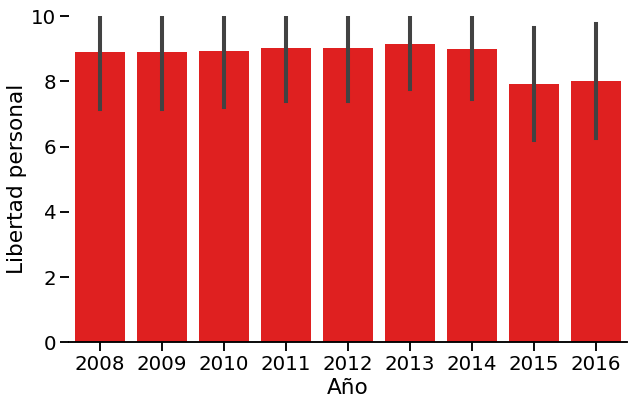

In [12]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='pf_identity',
               color='RED', ci='sd')
plt.ylabel('Libertad personal')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)



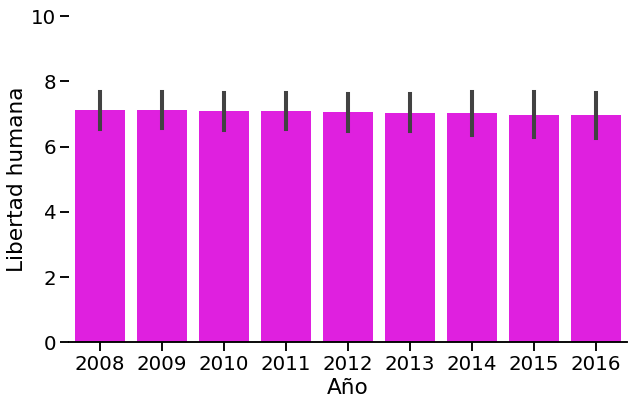

In [13]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='hf_score',
               color='#ff00ff', ci='sd')
plt.ylabel('Libertad humana')
plt.xlabel('Año')
plt.ylim(0, 10)
seaborn.despine(left=True)


3.En este estudio, la libertad se mide con dos estimadores principales: hf_score que hace referencia a Human Freedom, y 
    ef_score que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la 
    libertad de identidad?
    
    El estimador human freedom es una variable construída a partir del promedio entre la libertad personal y la libertad 
    económica. Es por eso que se observa en los rankings por países que algunos que presentan un puntaje alto en libertad 
    personal/identidad (Argentina 8.1), pero bajo en libertad económica (Argentina 5.04) da como resultado una libertad 
    humana promediada que se ve afectada por la dispersión de los datos (Argentina 6.6).

